In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [13]:
img_array = cv2.imread('train\Closed/_0.jpg', cv2.IMREAD_GRAYSCALE)

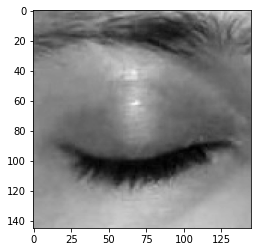

In [14]:
plt.imshow(img_array, cmap='gray')
plt.show()

In [15]:
img_array.shape

(145, 145)

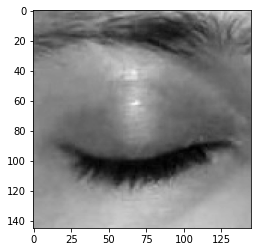

In [16]:
Datadirectory = "train"
Classes = ['Closed', 'Open']
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap='gray')
        break
    break

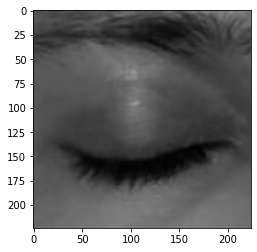

In [17]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [18]:
new_array.shape

(224, 224, 3)

Reading all images and cnverting them into an array for data and labels

In [19]:
training_data = []
img_size = 224

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])

create_training_data()

In [20]:
print(len(training_data))

1234


In [21]:
import random
random.shuffle(training_data)

In [25]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
    
X=np.array(x).reshape(-1, img_size, img_size, 3)

In [26]:
X.shape

(1234, 224, 224, 3)

In [27]:
#normalize the data

X = X/255.0

In [28]:
Y = np.array(y)

In [29]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [30]:
#Command to load X and Y

#pickle_in = open("X.pickle", "rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle", "rb")
#y = pickle.load(pickle_in)

Deep Learning Model for training

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
model = tf.keras.applications.mobilenet.MobileNet()

In [33]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

Transfer Learning

In [34]:
base_input = model.layers[0].input

In [35]:
base_output = model.layers[-4].output

In [36]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [37]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [38]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

Setting for Binary Classification (Open/ Closed)

In [39]:
new_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
new_model.fit(X,Y, epochs=1, validation_split = 0.1)

35/35 [==============================] - 908s 23s/step - loss: 0.1118 - accuracy: 0.9550 - val_loss: 0.2708 - val_accuracy: 0.9677


In [41]:
new_model.save('my_model_Drowsiness.h5')